# China administrative boundary 

In this notebook, we will work with high-resolution administrative boundary data for China, sourced from **[GADM](https://gadm.org/download_country.html)**.

**GADM (Global Administrative Areas)** is a spatial database of the location of the world's administrative areas (boundaries).  
It provides detailed geographic boundaries at multiple levels, including:

- **Level 0**: Country boundary
- **Level 1**: First-level subdivisions (e.g., Provinces in China)
- **Level 2**: Second-level subdivisions (e.g., Prefecture-level cities)
- **Level 3**: Third-level subdivisions (e.g., Counties, Districts)

This will allow us to conduct further geospatial analysis on a clean, hierarchical administrative map of China.

## Setup

In [15]:
import os
import requests
from bs4 import BeautifulSoup
import re
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## Download and Load GADM GeoJSON

In [4]:
# gadm latest version 

def get_gadm_version(url="https://gadm.org/data.html"):
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, "html.parser")

    # Search in the text pattern (ex: version is 4.1)
    text = soup.get_text(separator=' ', strip=True)
    version_match = re.search(r"version\s+is\s+(\d+\.\d+)", text, re.IGNORECASE)
    if version_match:
        return version_match.group(1)
    else:
        return None

if __name__ == "__main__":
    version = get_gadm_version()
    if version:
        print(f"Latest GADM version found: {version}")
    else:
        print("Could not find GADM version on the page.")


Latest GADM version found: 4.1


In [25]:
gadm_version = get_gadm_version()
version_nopoint = gadm_version.replace(".", "") 

In [7]:
base_url = f"https://geodata.ucdavis.edu/gadm/gadm{gadm_version}/json/"

output_folder = os.path.join("..", "..", "data", "raw_data")
os.makedirs(output_folder, exist_ok=True)

filename = f"gadm{version_nopoint}_CHN_3.json.zip"  # After some exploration analysis, we just download the level 3 that also contains the Provinces and Prefectures informations
zippath = os.path.join(output_folder, filename)

url = base_url + filename

print(f"Downloading {filename}...")
response = requests.get(url)
with open(zippath, "wb") as f:
    f.write(response.content)
print(f"✅ Downloaded: {zippath}")

print(f"Extracting {filename}...")
with zipfile.ZipFile(zippath, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

os.remove(zippath)
print(f"Deleted zip file: {filename}")

extracted_files = os.listdir(output_folder)
print("Extracted files:", extracted_files)

✅ Downloaded: ..\..\data\raw_data\gadm41_CHN_3.json.zip
Extracting gadm41_CHN_3.json.zip...
Deleted zip file: gadm41_CHN_3.json.zip
Extracted files: ['ChinaPV_vectorized', 'gadm41_CHN_3.json', 'Global-Solar-Power-Tracker-February-2025.xlsx', 'pv_china_2020']


# Clean

In [8]:
#County
counties = gpd.read_file(os.path.join("../../data/mapdata", f"gadm{version_nopoint}_CHN_3.json"))

In [9]:
counties.head()

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,CHN.1.1.1_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Anqing,NA,NA,Xiànjíshì,CountyCity,NA,NA,"MULTIPOLYGON (((117.01 30.496, 117.01 30.499, ..."
1,CHN.1.1.2_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Huaining,Huáiníng,怀宁县,Xiàn,County,NA,NA,"MULTIPOLYGON (((117.04 30.665, 117.04 30.657, ..."
2,CHN.1.1.3_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Qianshan,Qiánshān,潜山县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.76 30.824, 116.76 30.82, 1..."
3,CHN.1.1.4_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Susong,Sùsōng,宿松县,Xiàn,County,NA,NA,"MULTIPOLYGON (((115.94 30.427, 115.95 30.426, ..."
4,CHN.1.1.5_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Taihu,Tàihú,太湖县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.47 30.457, 116.47 30.451, ..."


In [10]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_3      2421 non-null   object  
 1   GID_0      2421 non-null   object  
 2   COUNTRY    2421 non-null   object  
 3   GID_1      2421 non-null   object  
 4   NAME_1     2421 non-null   object  
 5   NL_NAME_1  2421 non-null   object  
 6   GID_2      2421 non-null   object  
 7   NAME_2     2421 non-null   object  
 8   NL_NAME_2  2421 non-null   object  
 9   NAME_3     2421 non-null   object  
 10  VARNAME_3  2421 non-null   object  
 11  NL_NAME_3  2421 non-null   object  
 12  TYPE_3     2421 non-null   object  
 13  ENGTYPE_3  2421 non-null   object  
 14  CC_3       2421 non-null   object  
 15  HASC_3     2421 non-null   object  
 16  geometry   2421 non-null   geometry
dtypes: geometry(1), object(16)
memory usage: 321.7+ KB


### Handle Null Value

As we can see, there are no null values according to `.info()`, but the DataFrame contains the string `"NA"`, which is not considered as a null value by default.

In [14]:
counties.isna().sum()

GID_3                  0
GID_0                  0
Country                0
GID_1                  0
Province               0
Province_hanzi         0
GID_2                  0
Prefecture             0
Prefecture_hanzi       0
County                 0
County_pinying         0
County_hanzi           0
County_type_pinying    0
County_type_eng        0
CC_3                   0
HASC_3                 0
geometry               0
dtype: int64

In [16]:
# Replace all exact "NA" strings in the entire DataFrame with actual null values
counties = counties.replace("NA", np.nan)

C:\Users\charl\AppData\Local\Temp\ipykernel_14944\3332272217.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counties = counties.replace("NA", np.nan)


In [17]:
counties.isna().sum()

GID_3                     1
GID_0                     1
Country                   1
GID_1                     1
Province                  1
Province_hanzi            9
GID_2                     1
Prefecture                1
Prefecture_hanzi          9
County                    1
County_pinying          331
County_hanzi            331
County_type_pinying       1
County_type_eng           1
CC_3                   2421
HASC_3                 2413
geometry                  0
dtype: int64

### Rename de colums 

Let's rename de columns of GADM level 3 GeoDataFrame to make easier and more intuite to work with.

In [11]:
counties = counties.rename(columns={
    "COUNTRY": "Country",
    "NAME_1": "Province",
    "NL_NAME_1": "Province_hanzi",
    "NAME_2": "Prefecture",
    "NL_NAME_2": "Prefecture_hanzi",
    "NAME_3": "County",
    "VARNAME_3": "County_pinying",
    "NL_NAME_3": "County_hanzi",
    "TYPE_3": "County_type_pinying",
    "ENGTYPE_3": "County_type_eng",
})


### Rename Province for consistency 

In [20]:
print("Provinces in GADM:", counties['Province'].unique())

Provinces in GADM: ['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hubei' 'Hunan'
 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'NeiMongol' 'NingxiaHui'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'XinjiangUygur' 'Xizang' 'Yunnan' 'Zhejiang' nan]


As we can see, some province names are not standardized, which may complicate future merging operations.


In [21]:
province_name_mapping = {
    "NeiMongol": "Inner Mongolia",
    "NingxiaHui": "Ningxia",
    "XinjiangUygur": "Xinjiang",
    "Xizang": "Tibet"
}

In [22]:
counties["Province"] = counties["Province"].replace(province_name_mapping)

In [23]:
#Check
print("Provinces in GADM:", counties['Province'].unique())

Provinces in GADM: ['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hubei' 'Hunan'
 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Inner Mongolia' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Xinjiang' 'Tibet' 'Yunnan' 'Zhejiang' nan]


### Save preprocessed data

In [29]:
output_dir = "../../data/data_processed/mapdata"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, f"gadm{version_nopoint}_CHN_3_processed.json")

# Enregistre le DataFrame
counties.to_file(output_path, driver="GeoJSON")

## Exploration analysis 

### Visualization

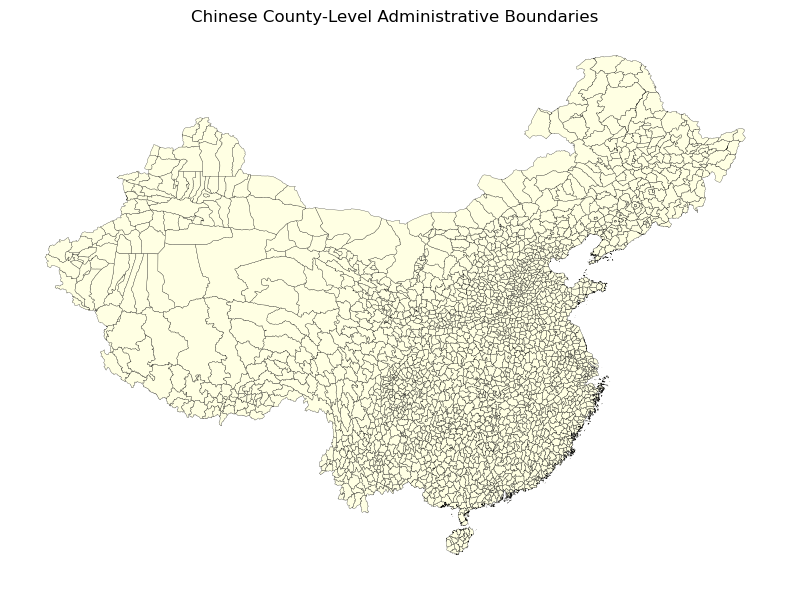

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

counties.plot(
    ax=ax,
    edgecolor='black',
    linewidth=0.2,
    facecolor='lightyellow',
    alpha=0.9
)

ax.set_title("Chinese County-Level Administrative Boundaries")
ax.set_axis_off()
plt.tight_layout()
plt.show()

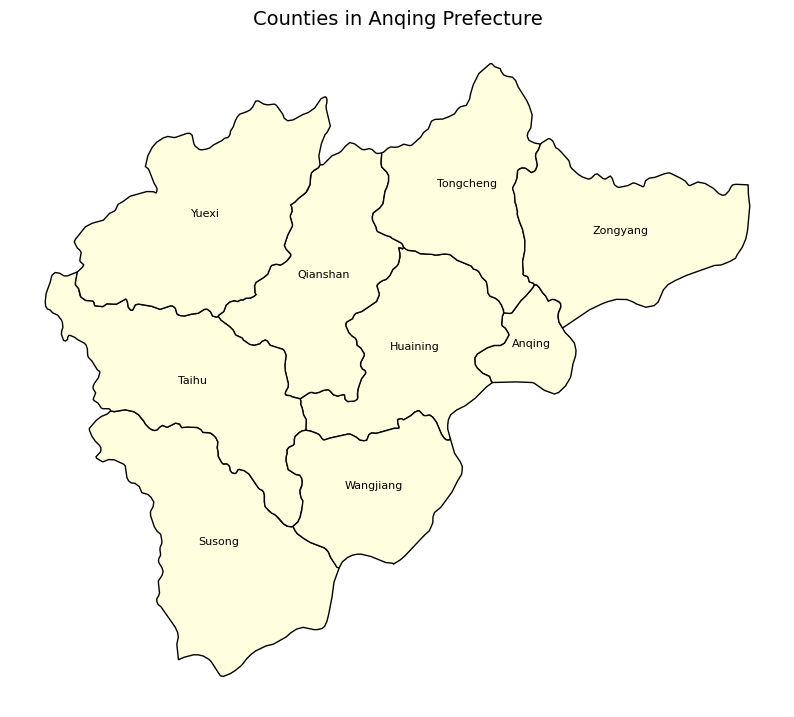

In [ ]:
anqing = counties[counties["NAME_2"] == "Anqing"]

fig, ax = plt.subplots(figsize=(10, 10))
anqing.plot(ax=ax, edgecolor='black', facecolor='lightyellow')

for idx, row in anqing.iterrows():
    if row["geometry"].centroid.is_empty:
        continue
    plt.annotate(
        text=row["NAME_3"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha='center',
        fontsize=8
)

ax.set_title("Counties in Anqing Prefecture", fontsize=14)
ax.axis("off")
plt.show()


In [ ]:
counties[counties["NAME_2"]=="Anqing"]

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,CHN.1.1.1_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Anqing,NA,NA,Xiànjíshì,CountyCity,NA,NA,"MULTIPOLYGON (((117.01 30.496, 117.01 30.499, ..."
1,CHN.1.1.2_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Huaining,Huáiníng,怀宁县,Xiàn,County,NA,NA,"MULTIPOLYGON (((117.04 30.665, 117.04 30.657, ..."
2,CHN.1.1.3_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Qianshan,Qiánshān,潜山县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.76 30.824, 116.76 30.82, 1..."
3,CHN.1.1.4_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Susong,Sùsōng,宿松县,Xiàn,County,NA,NA,"MULTIPOLYGON (((115.94 30.427, 115.95 30.426, ..."
4,CHN.1.1.5_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Taihu,Tàihú,太湖县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.47 30.457, 116.47 30.451, ..."
5,CHN.1.1.6_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Tongcheng,Tóngchéng,桐城市,Xiànjíshì,CountyCity,NA,NA,"MULTIPOLYGON (((117.13 30.733, 117.13 30.726, ..."
6,CHN.1.1.7_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Wangjiang,Wàngjiāng,望江县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.49 30.381, 116.5 30.378, 1..."
7,CHN.1.1.8_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Yuexi,Yuèxī,岳西县,Xiàn,County,NA,NA,"MULTIPOLYGON (((116.53 31.024, 116.52 31.017, ..."
8,CHN.1.1.9_1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,Zongyang,Zōngyáng,枞阳县,Xiàn,County,NA,NA,"MULTIPOLYGON (((117.21 30.628, 117.2 30.643, 1..."


According to [Wikipedia](https://fr.wikipedia.org/wiki/Anqing), Anqing is a prefecture-level city located in Anhui Province and is administratively composed of 3 districts (qu), 1 county-level city and 7 xian.
However, in our dataset, we observe that “Anqing” appears both as a prefecture (NAME_2) and as a county (NAME_3). This reflects the typical administrative structure in China, where the central urban district may share the same name as the prefecture-level city itself. Futhermore the 3 distrcicts (qu) are located within the city itselft and doesn't appear cleary in the GADM dataset. 